In [1]:
# 오늘 실습을 위한 작업디렉토리로 이동합니다.
!cd ~/aiffel/lxmert


from IPython.display import clear_output, Image, display
import PIL.Image
import io
import json
import torch
import numpy as np
from transformers import LxmertForQuestionAnswering, LxmertTokenizer
import wget
import pickle
import os, sys

# 추가해준 모듈을 임포트하기 위해 아래 경로를 path에 추가합니다. 
sys.path.append(os.getenv('HOME')+'/aiffel/lxmert')
from processing_image import Preprocess
from visualizing_image import SingleImageViz
from modeling_frcnn import GeneralizedRCNN
from utils import Config
import utils

In [2]:
# object definition
OBJ_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/objects_vocab.txt"
objids = utils.get_data(OBJ_URL)
print(len(objids))
print(objids[:30])

1600
['yolk', 'goal', 'bathroom', 'macaroni', 'umpire', 'toothpick', 'alarm clock', 'ceiling fan', 'photos', 'parrot', 'tail fin', 'birthday cake', 'calculator', 'catcher', 'toilet', 'batter', 'stop sign,stopsign', 'cone', 'microwave,microwave oven', 'skateboard ramp', 'tea', 'dugout', 'products', 'halter', 'kettle', 'kitchen', 'refrigerator,fridge', 'ostrich', 'bathtub', 'blinds']


In [3]:
# attribute definition
ATTR_URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/genome/1600-400-20/attributes_vocab.txt"
attrids = utils.get_data(ATTR_URL)
print(len(attrids))
print(attrids[:30])

400
['gray,grey', 'multi colored,multi-colored,multicolored', 'double decker,double-decker', 'unmade', 'red', 'camouflage', 'blue', 'white', 'green', 'pink', 'yellow', 'black', 'ivory', 'throwing', 'orange', 'spiky', 'plaid', 'purple', 'soccer', 'brake', 'blonde', 'american', 'flat screen', 'brown', 'wooden', 'performing', 'pulled back', 'windshield', 'bald', 'chocolate']


In [4]:
# VQA answer definition
VQA_URL = "https://raw.githubusercontent.com/airsplay/lxmert/master/data/vqa/trainval_label2ans.json"
vqa_answers = utils.get_data(VQA_URL)
print(len(vqa_answers))
print(vqa_answers[:30])

3129
['', 'woods', 'trash can', 'hanging', 'wooden', 'cooking', 'china', 'kids', 'bike rack', 'on phone', 'music', 'travel', 'tulip', 'arrow', 'branch', 'chevron', 'mouth', 'on right', 'rice', 'plate', 'lots', 'nature', 'fruits', 'throwing frisbee', 'blonde', 'life jacket', 'ham', 'hay', 'hat', 'to get to other side']


In [5]:
# 위 이미지의 URL
URL = "https://raw.githubusercontent.com/airsplay/py-bottom-up-attention/master/demo/data/images/input.jpg"

frcnn_cfg = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")
image_preprocess = Preprocess(frcnn_cfg)

images, sizes, scales_yx = image_preprocess(URL)

%s not found in cache or force_download set to True, downloading to %s https://s3.amazonaws.com/models.huggingface.co/bert/unc-nlp/frcnn-vg-finetuned/config.yaml /home/aiffel/.cache/torch/transformers/tmpexfvoamy



loading configuration file cache


In [6]:
print(images)
print(sizes)

tensor([[[[  37.0199,   32.2233,   25.0255,  ...,  -40.9723,  -31.3756,
            -24.9801],
          [  31.0199,   27.6623,   22.6238,  ...,  -42.1717,  -31.8553,
            -24.9801],
          [  22.0199,   20.8207,   19.0213,  ...,  -43.9708,  -32.5748,
            -24.9801],
          ...,
          [ -85.9802,  -83.9816,  -80.9824,  ...,   71.0138,   63.8164,
             59.0198],
          [ -87.7801,  -85.0620,  -80.9833,  ...,   66.2157,   61.1775,
             57.8199],
          [ -88.9801,  -85.7823,  -80.9838,  ...,   63.0170,   59.4182,
             57.0199]],

         [[  44.0535,   42.4546,   40.0554,  ...,  -27.9406,  -20.7431,
            -15.9465],
          [  49.2535,   44.4569,   37.2591,  ...,  -25.1393,  -16.2624,
            -10.3465],
          [  57.0535,   47.4602,   33.0647,  ...,  -20.9372,   -9.5412,
             -1.9465],
          ...,
          [ -99.9466,  -97.5482,  -93.9492,  ...,   52.0463,   43.6493,
             38.0533],
          [-101.74

In [7]:
test_questions_for_url1 = [
    "Where is this scene?",
    "what is the man riding?",
    "What is the man wearing?",
    "What is the color of the horse?"
]

In [8]:
frcnn_cfg = Config.from_pretrained("unc-nlp/frcnn-vg-finetuned")

frcnn = GeneralizedRCNN.from_pretrained("unc-nlp/frcnn-vg-finetuned", config=frcnn_cfg)

loading configuration file cache
%s not found in cache or force_download set to True, downloading to %s https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin /home/aiffel/.cache/torch/transformers/tmp1eo2ga7g



loading weights file https://cdn.huggingface.co/unc-nlp/frcnn-vg-finetuned/pytorch_model.bin from cache at /home/aiffel/.cache/torch/transformers/57f6df6abe353be2773f2700159c65615babf39ab5b48114d2b49267672ae10f.77b59256a4cf8343ae0f923246a81489fc8d82f98d082edc2d2037c977c0d9d0
All model checkpoint weights were used when initializing GeneralizedRCNN.

All the weights of GeneralizedRCNN were initialized from the model checkpoint at unc-nlp/frcnn-vg-finetuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use GeneralizedRCNN for predictions without further training.


In [9]:
frcnn_cfg.max_detections  # object detection 모델이 검출할 최대 object 개수

36

In [10]:
output_dict = frcnn(
    images, 
    sizes, 
    scales_yx=scales_yx, 
    padding="max_detections",
    max_detections=frcnn_cfg.max_detections,
    return_tensors="pt"
)

In [11]:
print(output_dict.get("boxes"))
print('-------------')
print(output_dict.get("boxes").shape)

tensor([[[1.6930e+02, 2.1428e+02, 4.8507e+02, 4.6975e+02],
         [1.0072e+02, 2.5157e+02, 3.9440e+02, 4.8000e+02],
         [5.8607e+02, 0.0000e+00, 6.3892e+02, 3.5348e+02],
         [6.0813e+02, 6.1844e+01, 6.3753e+02, 4.2312e+02],
         [2.8151e+02, 1.6208e+02, 3.2836e+02, 1.9436e+02],
         [1.5756e+02, 9.3071e+01, 3.9201e+02, 4.6143e+02],
         [2.2245e+02, 2.9141e+02, 5.6593e+02, 4.8000e+02],
         [4.1366e+01, 1.8160e+02, 3.4989e+02, 4.5049e+02],
         [1.3899e+01, 1.7041e+00, 2.0780e+02, 4.3721e+02],
         [3.8143e+02, 3.1056e+02, 6.1871e+02, 4.1796e+02],
         [2.6148e+02, 1.9268e+02, 3.6299e+02, 4.2911e+02],
         [2.0384e+02, 0.0000e+00, 3.0062e+02, 2.7995e+02],
         [2.9271e+00, 0.0000e+00, 1.2306e+02, 3.5311e+02],
         [2.4660e+02, 1.5944e+02, 3.4745e+02, 3.6034e+02],
         [5.5263e+01, 2.7269e+01, 1.2843e+02, 3.8614e+02],
         [4.4270e-01, 3.3880e+02, 5.0326e+02, 4.7818e+02],
         [1.7163e+02, 3.7074e+02, 4.6254e+02, 4.6932e+02

In [12]:
print(output_dict.get("roi_features"))
print('-------------')
print(output_dict.get("roi_features").shape)

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.3681e+00,
          3.4299e-03, 7.7600e+00],
         [0.0000e+00, 1.4429e-02, 1.7533e-01,  ..., 6.4004e+00,
          0.0000e+00, 6.6364e+00],
         [0.0000e+00, 0.0000e+00, 4.1719e-03,  ..., 2.0413e-01,
          8.4239e-01, 3.4729e+00],
         ...,
         [0.0000e+00, 8.2577e-01, 4.4683e-01,  ..., 6.3485e+00,
          4.1949e-02, 3.9396e-01],
         [0.0000e+00, 1.7906e-01, 1.4289e-01,  ..., 2.8292e+00,
          6.5108e-01, 1.2135e-02],
         [0.0000e+00, 2.0028e-01, 3.7835e-03,  ..., 8.0951e+00,
          6.9268e-01, 1.3321e-01]]])
-------------
torch.Size([1, 36, 2048])


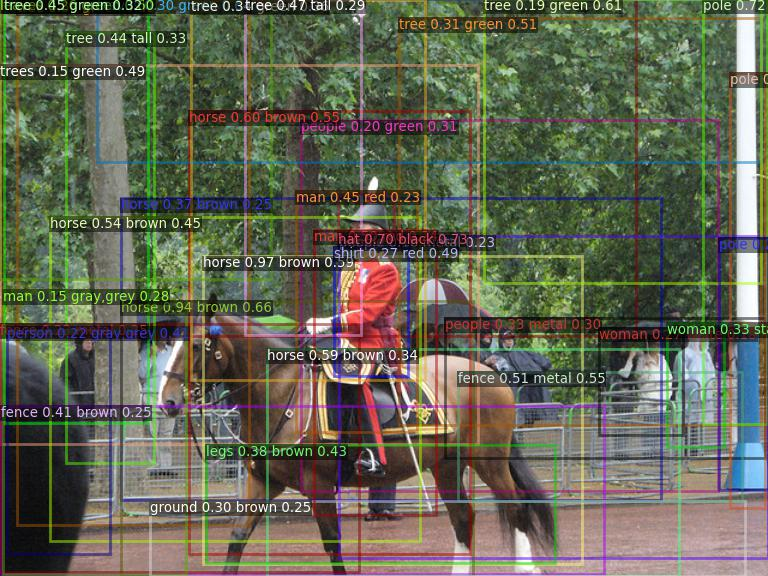

In [13]:
# for visualizing output
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

#image viz
frcnn_visualizer = SingleImageViz(URL, id2obj=objids, id2attr=attrids)

frcnn_visualizer.draw_boxes(
    output_dict.get("boxes"),
    output_dict.pop("obj_ids"),
    output_dict.pop("obj_probs"),
    output_dict.pop("attr_ids"),
    output_dict.pop("attr_probs"),
)
showarray(frcnn_visualizer._get_buffer())

In [14]:
#Very important that the boxes are normalized
normalized_boxes = output_dict.get("normalized_boxes")
features = output_dict.get("roi_features")

In [15]:
lxmert_tokenizer = LxmertTokenizer.from_pretrained("unc-nlp/lxmert-base-uncased")

In [16]:
test_question = ["what is the man riding?"]

inputs = lxmert_tokenizer(
    test_question,
    padding="max_length",
    max_length=20,
    truncation=True,
    return_token_type_ids=True,
    return_attention_mask=True,
    add_special_tokens=True,
    return_tensors="pt"
)

In [17]:
print(inputs.input_ids)
print(inputs.attention_mask)

tensor([[ 101, 2054, 2003, 1996, 2158, 5559, 1029,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [18]:
lxmert_vqa = LxmertForQuestionAnswering.from_pretrained("unc-nlp/lxmert-vqa-uncased")

In [19]:
output_vqa = lxmert_vqa(
    input_ids=inputs.input_ids,
    attention_mask=inputs.attention_mask,
    visual_feats=features,
    visual_pos=normalized_boxes,
    token_type_ids=inputs.token_type_ids,
    output_attentions=False,
)

output_vqa

LxmertForQuestionAnsweringOutput(loss=None, question_answering_score=tensor([[-4.8003, -2.0933, -5.0623,  ..., -3.4784,  0.5502, -0.9368]],
       grad_fn=<AddmmBackward>), language_hidden_states=None, vision_hidden_states=None, language_attentions=None, vision_attentions=None, cross_encoder_attentions=None)

In [20]:
len(output_vqa["question_answering_score"][0])

3129

In [21]:
# get prediction
pred_vqa = output_vqa["question_answering_score"].argmax(-1)

pred_vqa

tensor([315])

In [22]:
vqa_answers[315]

'horse'

In [23]:
print("Question:", test_question)
print("prediction from LXMERT VQA:", vqa_answers[pred_vqa])

Question: ['what is the man riding?']
prediction from LXMERT VQA: horse


# VQA 성능검증

In [24]:
test_questions_for_url1 = [
    "Where is this scene?",
    "what is the man riding?",
    "What is the man wearing?",
    "What is the color of the horse?"
]

for test_question in test_questions_for_url1:
    # run lxmert
    test_question = [test_question]

    inputs = lxmert_tokenizer(
        test_question,
        padding="max_length",
        max_length=20,
        truncation=True,
        return_token_type_ids=True,
        return_attention_mask=True,
        add_special_tokens=True,
        return_tensors="pt"
    )

    # run lxmert(s)
    output_vqa = lxmert_vqa(
        input_ids=inputs.input_ids,
        attention_mask=inputs.attention_mask,
        visual_feats=features,
        visual_pos=normalized_boxes,
        token_type_ids=inputs.token_type_ids,
        output_attentions=False,
    )
    # get prediction
    pred_vqa = output_vqa["question_answering_score"].argmax(-1)
    print("Question:", test_question)
    print("prediction from LXMERT VQA:", vqa_answers[pred_vqa])

Question: ['Where is this scene?']
prediction from LXMERT VQA: outdoors
Question: ['what is the man riding?']
prediction from LXMERT VQA: horse
Question: ['What is the man wearing?']
prediction from LXMERT VQA: suit
Question: ['What is the color of the horse?']
prediction from LXMERT VQA: brown
